In [1]:
import pandas as pd
df = pd.read_csv('../input/iowa-liquor-sales/Iowa_Liquor_Sales.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               object        
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               float64       
 11  Category Name          object        
 12  Vendor Number          float64       
 13  Vendor Name            object        
 14  Item Number            int64         
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost   

In [5]:
print(df['Date'].min())
print(df['Date'].max())

2012-01-03 00:00:00
2017-10-31 00:00:00


In [6]:
df_filter = df[df['Date'].dt.year > 2015]
print(df_filter['Date'].min())
print(df_filter['Date'].max())
print(df_filter.shape)

2016-01-04 00:00:00
2017-10-31 00:00:00
(4162976, 24)


In [7]:
df_filter.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            70746
County                   70746
Category                  6185
Category Name            11935
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [8]:
#df_filter.dropna(inplace = True)
print(df_filter.shape)
df_filter.duplicated().sum()

(4162976, 24)


0

In [9]:
df_filter.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [10]:
df_filter=df_filter[['Date', 'Store Number', 'Store Name','City','Category',
       'Category Name', 'Vendor Name', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']]
df_filter

,Date,Store Number,Store Name,City,Category,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
8427861,2016-01-26,3621,"Jensen Liquors, Ltd.",SHELDON,1012200.0,SCOTCH WHISKIES,"WILDMAN AND SONS, F.",Sheep Dip,6,750,$21.50,$32.25,1,$32.25,0.75,0.20
8428102,2016-01-12,2552,Hy-Vee Food Store #3 / Cedar Rapids,CEDAR RAPIDS,1701100.0,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,2,$58.74,1.50,0.40
8428103,2016-01-13,2513,Hy-Vee Food Store #2 / Iowa City,IOWA CITY,1701100.0,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,12,$352.44,9.00,2.38
8428104,2016-01-13,3869,Bootleggin' Barzini's Fin,CORALVILLE,1701100.0,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,3,$88.11,2.25,0.59
8428105,2016-01-14,2106,Hillstreet News and Tobacco,CEDAR FALLS,1701100.0,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,1,$29.37,0.75,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1071100.0,Cocktails /RTD,Mhw LTD,FrappaChata Iced Coffee Blend,12,800,$8.00,$12.00,3,$12.00,2.40,0.63
12591073,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011200.0,Straight Bourbon Whiskies,Brown Forman Corp.,Old Forester Statesman,6,750,$27.48,$41.22,2,$41.22,1.50,0.39
12591074,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011500.0,Bottled in Bond Bourbon,Brown Forman Corp.,Old Forester 1897 Whisky Row Series,6,750,$24.98,$37.47,2,$37.47,1.50,0.39
12591075,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011200.0,Straight Bourbon Whiskies,Brown Forman Corp.,Old Forester 1870 Whisky Row Series,6,750,$22.49,$33.74,2,$33.74,1.50,0.39


In [11]:
# Getting rid of $ in each value of column and change the type to floats
df_filter['State Bottle Retail'] = df_filter['State Bottle Retail'].str.replace('$', '').astype('float')
df_filter['State Bottle Cost'] = df_filter['State Bottle Cost'].str.replace('$', '').astype('float')
df_filter['Sale (Dollars)'] = df_filter['Sale (Dollars)'].str.replace('$', '').astype('float')
df_filter.info()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4162976 entries, 8427861 to 12591076
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Store Number           int64         
 2   Store Name             object        
 3   City                   object        
 4   Category               float64       
 5   Category Name          object        
 6   Vendor Name            object        
 7   Item Description       object        
 8   Pack                   int64         
 9   Bottle Volume (ml)     int64         
 10  State Bottle Cost      float64       
 11  State Bottle Retail    float64       
 12  Bottles Sold           int64         
 13  Sale (Dollars)         float64       
 14  Volume Sold (Liters)   float64       
 15  Volume Sold (Gallons)  float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(5)
memory usage: 539.9+ MB


In [12]:
#renaming & Removing Punctuations
df_filter.rename(columns={"State Bottle Retail" : "State Bottle Retail ($)", "State Bottle Cost": "State Bottle Cost ($)", "Sale (Dollars)": "Sale ($)"}, inplace=True)
def remove_punctuation(x):
    try:
        x = x.str.replace('[!"#$%\'()*+,-.:;<=>?@[\\]^_`{}~]','')
    except:
        pass
    return x
df_filter = df_filter.apply(remove_punctuation)
df_filter[['Store Name', 'City', 'Category Name', 'Vendor Name']] = df_filter[['Store Name', 'City', 'Category Name', 'Vendor Name']].apply(lambda x: x.str.title()) 
df_filter

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,Date,Store Number,Store Name,City,Category,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale ($),Volume Sold (Liters),Volume Sold (Gallons)
8427861,2016-01-26,3621,Jensen Liquors Ltd,Sheldon,1012200.0,Scotch Whiskies,Wildman And Sons F,Sheep Dip,6,750,21.50,32.25,1,32.25,0.75,0.20
8428102,2016-01-12,2552,Hyvee Food Store 3 / Cedar Rapids,Cedar Rapids,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,2,58.74,1.50,0.40
8428103,2016-01-13,2513,Hyvee Food Store 2 / Iowa City,Iowa City,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,12,352.44,9.00,2.38
8428104,2016-01-13,3869,Bootleggin Barzinis Fin,Coralville,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,3,88.11,2.25,0.59
8428105,2016-01-14,2106,Hillstreet News And Tobacco,Cedar Falls,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,1,29.37,0.75,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1071100.0,Cocktails /Rtd,Mhw Ltd,FrappaChata Iced Coffee Blend,12,800,8.00,12.00,3,12.00,2.40,0.63
12591073,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011200.0,Straight Bourbon Whiskies,Brown Forman Corp,Old Forester Statesman,6,750,27.48,41.22,2,41.22,1.50,0.39
12591074,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011500.0,Bottled In Bond Bourbon,Brown Forman Corp,Old Forester 1897 Whisky Row Series,6,750,24.98,37.47,2,37.47,1.50,0.39
12591075,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011200.0,Straight Bourbon Whiskies,Brown Forman Corp,Old Forester 1870 Whisky Row Series,6,750,22.49,33.74,2,33.74,1.50,0.39


In [13]:
#(pd.DataFrame(df_filter['City'])).values.tolist()
pd.DataFrame(df_filter.loc[(df_filter['City'].isnull())])

,Date,Store Number,Store Name,City,Category,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale ($),Volume Sold (Liters),Volume Sold (Gallons)
9906975,2016-09-01,4725,Caseys General Store 1548 / Ankeny,NaN,1012100.0,Canadian Whiskies,Diageo Americas,Crown Royal,12,750,15.07,22.61,10,22.61,7.50,1.98
9907028,2016-09-01,4725,Caseys General Store 1548 / Ankeny,NaN,1012100.0,Canadian Whiskies,Constellation Brands Inc,Black Velvet Mini,10,600,6.80,10.20,2,10.20,1.20,0.31
9907046,2016-09-01,4725,Caseys General Store 1548 / Ankeny,NaN,1012100.0,Canadian Whiskies,Constellation Brands Inc,Black Velvet,24,375,3.07,4.61,12,4.61,4.50,1.18
9907064,2016-09-09,4767,Caseys General Store 3075 / Ankeny,NaN,1062400.0,Spiced Rum,Heaven Hill Brands,Admiral Nelson Spiced Rum,24,375,2.74,4.11,18,4.11,6.75,1.78
9907139,2016-09-01,4725,Caseys General Store 1548 / Ankeny,NaN,1011200.0,Straight Bourbon Whiskies,Heaven Hill Brands,Evan Williams Str Bourbon,12,750,7.47,11.21,6,11.21,4.50,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12498215,2017-10-17,4378,Kum & Go 202 / 4Th St Waukee,NaN,1031100.0,American Vodkas,Luxco Inc,Hawkeye Vodka,12,750,3.34,5.01,1,60.12,0.75,0.19
12498216,2017-10-17,4378,Kum & Go 202 / 4Th St Waukee,NaN,1062200.0,White Rum,Bacardi Usa Inc,Bacardi Superior Rum,12,750,8.26,12.39,6,12.39,4.50,1.18
12498217,2017-10-17,4378,Kum & Go 202 / 4Th St Waukee,NaN,1081600.0,Whiskey Liqueur,Sazerac Company Inc,Fireball Cinnamon Whisky,24,375,5.33,8.00,12,8.00,4.50,1.18
12498218,2017-10-17,4378,Kum & Go 202 / 4Th St Waukee,NaN,1041100.0,American Dry Gins,Pernod Ricard Usa,Seagrams Extra Dry Gin,24,375,3.39,5.09,6,5.09,2.25,0.59


In [14]:
#(pd.DataFrame(df_filter.loc[(df_filter['Store Name'] == 'The Secret Cellar')& (df_filter['City'] == 'Shueyville') & (df_filter['Date'].dt.year == 2017)]).sort_values(by=['Date'], ascending=True))
df_filter['City'].loc[(df_filter['Store Name'] == 'Hyvee Food Store')].nunique()

0

In [15]:
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 202 / 4Th St Waukee', ['Store Name', 'City']] = 'Kum & Go 202','Waukee'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store  2783/ Urband', ['Store Name', 'City']] = 'Caseys General Store 2783', 'Urbandale'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1125 / Humest', ['Store Name', 'City']] = 'Caseys General Store 1125','Humeston'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go  532/ West Dsm', ['Store Name', 'City']] = 'Kum & Go  532','West Des Moines'
df_filter.loc[df_filter['Store Name'] == 'Fareway Stores 703 / Humbolt', ['Store Name', 'City']] = 'Fareway Stores 703','Humboldt'
df_filter.loc[df_filter['Store Name'] == 'D And S Grocery', 'City'] = 'Melcherdallas'
df_filter.loc[df_filter['Store Name'] == 'Point Liquor & Tobacco', 'City'] = 'Cedar Rapids'
df_filter.loc[df_filter['Store Name'] == 'North American Spirits', 'City'] = 'Urbandale'
df_filter.loc[(df_filter['Store Name'] == 'The Secret Cellar') & (df_filter['Date'] < '2017-09-12'), 'City'] = 'Swisher'
df_filter.loc[(df_filter['Store Name'] == 'The Secret Cellar') & (df_filter['Date'] >= '2017-09-12'), 'City'] = 'Shueyville'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store  2560', 'City'] = 'Ames'
df_filter.loc[df_filter['Store Name'] == 'Gameday Liquor', 'City'] = 'Glenwood'
df_filter.loc[df_filter['Store Name'] == 'Liquor And Grocery Depot', 'City'] = 'Marshalltown'
df_filter.loc[df_filter['Store Name'] == 'Express Mart', 'City'] = 'Muscatine'
df_filter.loc[df_filter['Store Name'] == 'Av Superstop', 'City'] = 'Des Moines'
df_filter.loc[df_filter['Store Name'] == 'U S Gas', 'City'] = 'Des Moines'
df_filter.loc[df_filter['Store Name'] == 'River Mart', 'City'] = 'West Burlington'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1548 / Ankeny', 'City'] = 'Ankeny'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 3075 / Ankeny', 'City'] = 'Ankeny'
df_filter.loc[df_filter['Store Name'] == 'Hyvee Wine And Spirits / Estherville', 'City'] = 'Estherville'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 3508/ Marsha', 'City'] = 'Marsha'
df_filter.loc[df_filter['Store Name'] == 'Fareway Stores 151 / Cedar Rapids', 'City'] = 'Cedar Rapids'
df_filter.loc[df_filter['Store Name'] == 'Mmdg Spirits / Ames', 'City'] ='Ames'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 438 / Muscatine', 'City'] = 'Muscatine'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1567 / Anita', 'City'] = 'Anita'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1503 / Tabor', 'City'] = 'Tabor'
df_filter.loc[df_filter['Store Name'] == 'Hyvee Food And Drug 6 / Cedar Rapids', 'City'] ='Cedar Rapids'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1365 / Paullina','City'] = 'Paullina'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1680 / Adel', 'City'] = 'Adel'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store  2598/ Pella', 'City'] ='Pella'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1617 / Jefferson', 'City'] = 'Jefferson'
df_filter.loc[df_filter['Store Name'] == 'Indy 66 West 929 / Indianola', 'City'] = 'Indianola'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 4098 / Windsor Heights', 'City'] = 'Windsor Heights'
df_filter.loc[df_filter['Store Name'] == 'Jeffs Market / Wilton', 'City'] = 'Wilton'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 502 / Iowa City', 'City'] = 'Iowa City'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 201 / Coralville','City'] = 'Coralville'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 768 / Hospers','City'] = 'Hospers'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store  2417/ Newton', 'City'] = 'Newton'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1493 / Van Meter', 'City'] = 'Van Meter'
df_filter.loc[df_filter['Store Name'] == 'Caseys General Store 1684 / Emmetsburg', 'City'] = 'Emmetsburg'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 521  /  Coralville', 'City'] ='Coralville'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 540 / Waukee', 'City'] = 'Waukee'
df_filter.loc[df_filter['Store Name'] == 'Hyvee Drugstore / Council Bluffs', 'City'] = 'Council Bluffs'
df_filter.loc[df_filter['Store Name'] == 'Fareway Store  167/Johnston', 'City'] ='Johnston'
df_filter.loc[df_filter['Store Name'] == 'Fas Mart  5150/ Cedar Rapids', 'City'] = 'Cedar Rapids'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go 83 / Casey', 'City'] = 'Casey'
df_filter.loc[df_filter['Store Name'] == 'Kum & Go  119/ Northwood', 'City'] = 'Northwood'
df_filter['Store Name'] = df_filter['Store Name'].str.split(' / ', 1).str[0]
df_filter.isnull().sum()

Date                           0
Store Number                   0
Store Name                     0
City                         261
Category                    6185
Category Name              11935
Vendor Name                    1
Item Description               0
Pack                           0
Bottle Volume (ml)             0
State Bottle Cost ($)          0
State Bottle Retail ($)        0
Bottles Sold                   0
Sale ($)                       0
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
dtype: int64

In [16]:
print((df_filter.groupby('Category')['Category Name'].unique().to_frame()).head(47))
print((df_filter.groupby('Category')['Category Name'].unique().to_frame()).tail(50))

                                               Category Name
Category                                                    
1011100.0                                 [Blended Whiskies]
1011200.0                        [Straight Bourbon Whiskies]
1011250.0                   [Single Barrel Bourbon Whiskies]
1011300.0  [Tennessee Whiskies, Single Barrel Bourbon Whi...
1011400.0      [Bottled In Bond Bourbon, Tennessee Whiskies]
1011500.0   [Straight Rye Whiskies, Bottled In Bond Bourbon]
1011600.0             [Corn Whiskies, Straight Rye Whiskies]
1011700.0                               [nan, Corn Whiskies]
1011800.0                         [Iowa Distillery Whiskies]
1012100.0                                [Canadian Whiskies]
1012200.0                                  [Scotch Whiskies]
1012210.0                               [Single Malt Scotch]
1012300.0               [Irish Whiskies, Single Malt Scotch]
1012400.0                  [Japanese Whisky, Irish Whiskies]
1022100.0               

In [17]:
#Changing Category Name based on the Category Number
df_filter.loc[df_filter['Category Name'] == 'Single Barrel Bourbon Whiskies', 'Category'] = 1011300.0
df_filter.loc[df_filter['Category Name'] == 'Temporary & Specialty Packages', 'Category'] = 1700000.0
df_filter.loc[df_filter['Category Name'] == 'Corn Whiskies', 'Category'] = 1011700.0
df_filter.loc[df_filter['Category Name'] == 'American Vodkas', ['Category', 'Category Name']] = 1031000.0,'American Vodka' 
df_filter.loc[df_filter['Category Name'] == 'Straight Rye Whiskies', 'Category'] = 1011600.0
df_filter.loc[df_filter['Category Name'] == 'Bottled In Bond Bourbon', 'Category'] = 1011500.0
df_filter.loc[df_filter['Category Name'] == 'Tennessee Whiskies', 'Category'] = 1011400.0
df_filter.loc[df_filter['Category Name'] == 'Single Malt Scotch', 'Category'] = 1012210.0
df_filter.loc[df_filter['Category Name'] == 'Irish Whiskies', 'Category'] = 1012300.0
df_filter.loc[df_filter['Category Name'] == 'Flavored Gins', 'Category'] = 1041000.0
df_filter.loc[df_filter['Category Name'] == 'Cocktails /Rtd', 'Category'] = 1070000.0
df_filter.loc[df_filter['Category Name'] == 'Spiced Rum', 'Category'] = 1062310.0
df_filter.loc[df_filter['Category Name'] == 'Imported Vodkas', ['Category', 'Category Name']] = 1032000.0,'American Vodka'
df_filter.loc[df_filter['Category Name'] == 'Imported Vodka', 'Category'] = 1032000.0
df_filter.loc[df_filter['Category Name'] == 'Flavored Rum', 'Category'] = 1062500.0
df_filter.loc[df_filter['Category Name'] == 'Cocktails /Rtd', 'Category Name'] = 'Cocktails / Rtd'
df_filter.loc[df_filter['Category Name'] == 'Coffee Liqueurs', 'Category'] = 1081030.0
df_filter.loc[df_filter['Category Name'] == 'American Dry Gins', 'Category'] = 1041100.0
df_filter.loc[df_filter['Category Name'] == 'American Vodka', 'Category'] = 1031000.0
df_filter.loc[df_filter['Category Name'] == 'American Sloe Gins', 'Category'] = 1041300.0
df_filter.loc[df_filter['Category Name'] == 'American Cordials & Liqueurs', 'Category'] = 1081000.0
df_filter.loc[df_filter['Category Name'] == 'Imported Distilled Spirits Specialty', 'Category'] = 1092000.0
df_filter.loc[df_filter['Category Name'] == 'Imported Cordials & Liqueur', ['Category', 'Category Name']] = 1082000.0,'Imported Cordials & Liqueurs' 
df_filter.loc[df_filter['Category Name'] == 'American Cordials & Liqueur', ['Category', 'Category Name']] = 1081000,'American Cordials & Liqueurs' 
df_filter.loc[df_filter['Category Name'] == 'Imported Distilled Spirit Specialty', ['Category', 'Category Name']] = 1092000.0,'Imported Distilled Spirits Specialty'
df_filter.loc[df_filter['Category Name'] == 'Temporary &  Specialty Packages', 'Category Name'] = 'Temporary & Specialty Packages'
df_filter.loc[df_filter['Category Name'] == 'Vodka Flavored', 'Category Name'] = 'American Flavored Vodka'
df_filter.loc[df_filter['Category Name'] == 'American Vodka Flavored', 'Category Name'] = 'American Flavored Vodka'
df_filter.loc[(df_filter['Category Name'] == 'Tequila')|(df_filter['Category Name'] == 'Mixto'), 'Category Name'] = 'Mixto Tequila'
df_filter.loc[df_filter['Category Name'] == 'Imported Vodka  Misc', 'Category Name'] = 'Imported Flavored Vodka'
df_filter.loc[df_filter['Category Name'] == 'American Gins', 'Category Name'] = 'Flavored Gins'
df_filter.loc[(df_filter['Category Name'] == 'Apricot Brandies')|(df_filter['Category Name'] == 'American Brandies'), 'Category Name'] = 'Apricot Brandies (American Brandies)'
df_filter.loc[(df_filter['Category Name'] == 'Jamaica Rum')|(df_filter['Category Name'] == 'Gold Rum'), 'Category Name'] = 'Jamaica Rum (Gold Rum)'
df_filter.loc[(df_filter['Category Name'] == 'Puerto Rico & Virgin Islands Rum')|(df_filter['Category Name'] == 'White Rum'), 'Category Name'] = 'Puerto Rico & Virgin Islands Rum (White Rum)'
df_filter.loc[(df_filter['Category Name'] == 'Triple Sec') & (df_filter['Category'] == 1081400.0), 'Category Name'] = 'American Schnapps (Triple Sec)'
df_filter.loc[(df_filter['Category Name'] == 'American Schnapps') & (df_filter['Category'] == 1081400.0), 'Category Name'] = 'American Schnapps (Triple Sec)'

In [18]:
df_filter['Category Name'].nunique()

91

In [19]:
(df_filter.groupby('City')['City'].unique()).values.tolist()

[array(['Ackley'], dtype=object),
 array(['Adair'], dtype=object),
 array(['Adel'], dtype=object),
 array(['Afton'], dtype=object),
 array(['Akron'], dtype=object),
 array(['Albert City'], dtype=object),
 array(['Albia'], dtype=object),
 array(['Albion'], dtype=object),
 array(['Alburnett'], dtype=object),
 array(['Alden'], dtype=object),
 array(['Algona'], dtype=object),
 array(['Allison'], dtype=object),
 array(['Alta'], dtype=object),
 array(['Altoona'], dtype=object),
 array(['Amana'], dtype=object),
 array(['Ames'], dtype=object),
 array(['Anamosa'], dtype=object),
 array(['Anita'], dtype=object),
 array(['Ankeny'], dtype=object),
 array(['Anthon'], dtype=object),
 array(['Arlington'], dtype=object),
 array(['Armstrong'], dtype=object),
 array(['Arnolds Park'], dtype=object),
 array(['Atkins'], dtype=object),
 array(['Atlantic'], dtype=object),
 array(['Audubon'], dtype=object),
 array(['Aurelia'], dtype=object),
 array(['Avoca'], dtype=object),
 array(['Baldwin'], dtype=object),


In [20]:
df_filter.loc[df_filter['City'] == 'Clearlake', 'City'] = 'Clear Lake'
df_filter.loc[df_filter['City'] == 'Otumwa', 'City'] = 'Ottuwma'
df_filter.loc[df_filter['City'] == 'Ottumwa', 'City'] = 'Ottuwma'
df_filter.loc[df_filter['City'] == 'Leclaire', 'City'] = 'Le Claire'
df_filter.loc[df_filter['City'] == 'Grand Mounds', 'City'] = 'Grand Mound'
df_filter.isnull().sum()

Date                           0
Store Number                   0
Store Name                     0
City                         261
Category                    6185
Category Name              11935
Vendor Name                    1
Item Description               0
Pack                           0
Bottle Volume (ml)             0
State Bottle Cost ($)          0
State Bottle Retail ($)        0
Bottles Sold                   0
Sale ($)                       0
Volume Sold (Liters)           0
Volume Sold (Gallons)          0
dtype: int64

In [21]:
df_filter.dropna(inplace = True)
df_filter.isnull().sum()

Date                       0
Store Number               0
Store Name                 0
City                       0
Category                   0
Category Name              0
Vendor Name                0
Item Description           0
Pack                       0
Bottle Volume (ml)         0
State Bottle Cost ($)      0
State Bottle Retail ($)    0
Bottles Sold               0
Sale ($)                   0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [22]:
# Creating new column of net profit per bottle for each bottle
df_filter['State Profit Per Bottle ($)'] = df_filter['State Bottle Retail ($)'] - df_filter['State Bottle Cost ($)']
df_filter['State Profit Total Bottle ($)'] = df_filter['State Profit Per Bottle ($)']*df_filter['Bottles Sold']
df_filter

,Date,Store Number,Store Name,City,Category,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale ($),Volume Sold (Liters),Volume Sold (Gallons),State Profit Per Bottle ($),State Profit Total Bottle ($)
8427861,2016-01-26,3621,Jensen Liquors Ltd,Sheldon,1012200.0,Scotch Whiskies,Wildman And Sons F,Sheep Dip,6,750,21.50,32.25,1,32.25,0.75,0.20,10.75,10.75
8428102,2016-01-12,2552,Hyvee Food Store 3,Cedar Rapids,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,2,58.74,1.50,0.40,9.79,19.58
8428103,2016-01-13,2513,Hyvee Food Store 2,Iowa City,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,12,352.44,9.00,2.38,9.79,117.48
8428104,2016-01-13,3869,Bootleggin Barzinis Fin,Coralville,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,3,88.11,2.25,0.59,9.79,29.37
8428105,2016-01-14,2106,Hillstreet News And Tobacco,Cedar Falls,1701100.0,Decanters & Specialty Packages,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,1,29.37,0.75,0.20,9.79,9.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1070000.0,Cocktails / Rtd,Mhw Ltd,FrappaChata Iced Coffee Blend,12,800,8.00,12.00,3,12.00,2.40,0.63,4.00,12.00
12591073,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011200.0,Straight Bourbon Whiskies,Brown Forman Corp,Old Forester Statesman,6,750,27.48,41.22,2,41.22,1.50,0.39,13.74,27.48
12591074,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011500.0,Bottled In Bond Bourbon,Brown Forman Corp,Old Forester 1897 Whisky Row Series,6,750,24.98,37.47,2,37.47,1.50,0.39,12.49,24.98
12591075,2017-10-31,5423,Stammer Liquor Corp,Sheldon,1011200.0,Straight Bourbon Whiskies,Brown Forman Corp,Old Forester 1870 Whisky Row Series,6,750,22.49,33.74,2,33.74,1.50,0.39,11.25,22.50


<h2>10 liquor categories with highest sale</h2>

In [23]:
import plotly.graph_objects as go
import plotly.express as px
import plotly as py

best10 = df_filter.groupby(['Category Name','Pack','Date'])['Sale ($)'].sum().groupby(['Category Name','Pack']).max().sort_values().groupby(['Category Name']).sum().sort_values(ascending=False).reset_index()

best10_plot = px.bar(best10.head(10),x=best10['Category Name'].head(10), y='Sale ($)',color='Sale ($)')
best10_plot.update_layout(
    title="10 Best Selling Liquor Categories",
    xaxis_title="Category Name",
    yaxis_title="Sale ($)")
best10_plot.show()

<h2>10 liquor categories with lowest sale</h2>

In [24]:
lowest10 = df_filter.groupby(['Category Name','Pack','Date'])['Sale ($)'].sum().groupby(['Category Name','Pack']).max().sort_values().groupby(['Category Name']).sum().sort_values(ascending=True).reset_index()

lowest10_plot = px.bar(lowest10.head(10),x=lowest10['Category Name'].head(10), y='Sale ($)',color='Sale ($)')
lowest10_plot.update_layout(
    title="Sales of liquor per category",
    xaxis_title="Category Name",
    yaxis_title="Sale ($)")
lowest10_plot.show()

<h2>The Most Popular Consumed Liquors</h2>

In [25]:
mostpopular = df_filter.groupby(['Category Name','Pack','Date'])['Volume Sold (Gallons)'].sum().groupby(['Category Name','Pack']).max().sort_values().groupby(['Category Name']).sum().sort_values(ascending=False).reset_index()

mostpopular_plot = px.bar(mostpopular.head(10),x=mostpopular['Category Name'].head(10), y='Volume Sold (Gallons)',color='Volume Sold (Gallons)')
mostpopular_plot.update_layout(
    title="The Most Popular Consumed Liquors",
    xaxis_title='Category Name',
    yaxis_title="Volume Sold (Gallons)")
mostpopular_plot.show()

<h2>The Least Popular Consumed Liquors</h2>

In [26]:
leastpopular = df_filter.groupby(['Category Name','Pack','Date'])['Volume Sold (Gallons)'].sum().groupby(['Category Name','Pack']).min().sort_values().groupby(['Category Name']).sum().sort_values(ascending=True).reset_index()

leastpopular_plot = px.bar(leastpopular.head(10),x=leastpopular['Category Name'].head(10), y='Volume Sold (Gallons)',color='Volume Sold (Gallons)')
leastpopular_plot.update_layout(
    title="The Least Popular Consumed Liquors",
    xaxis_title='Category Name',
    yaxis_title="Volume Sold (Gallons)")
leastpopular_plot.show()

<h2>10 Stores Sold the Most Gallons of Liquor</h2>

In [27]:
stores = df_filter.groupby(['Store Name','Pack','Date'])['Volume Sold (Gallons)'].sum().groupby(['Store Name','Pack']).max().sort_values().groupby(['Store Name']).sum().sort_values(ascending=False).reset_index()

stores_plot = px.bar(stores.head(10),x=stores['Store Name'].head(10), y='Volume Sold (Gallons)',color='Volume Sold (Gallons)')
stores_plot.update_layout(
    title="10 Stores Sold the Most Gallons of Liquor",
    xaxis_title='Store Name',
    yaxis_title="Volume Sold (Gallons)")
stores_plot.show()

<h2>The Most Liquor Consuming Cities</h2>

In [28]:
cities = df_filter.groupby(['City','Pack','Date'])['Volume Sold (Gallons)'].sum().groupby(['City','Pack']).max().sort_values().groupby(['City']).sum().sort_values(ascending=False).reset_index()
cities_plot = px.bar(cities.head(12),x=cities.City.head(12), y='Volume Sold (Gallons)',color='Volume Sold (Gallons)')
cities_plot.update_layout(
    title="The Most Liquor Consuming Cities",
    xaxis_title='City',
    yaxis_title="Volume Sold (Gallons)")
cities_plot.show()

<h2>The Highest Profit Contributor Liquor Categories </h2>

In [29]:
profit = df_filter.groupby(['Category Name','Pack','Date'])['State Profit Total Bottle ($)'].sum().groupby(['Category Name','Pack']).max().sort_values().groupby(['Category Name']).sum().sort_values(ascending=False).reset_index()

profit_plot = px.bar(profit.head(10),x=profit['Category Name'].head(10), y='State Profit Total Bottle ($)',color='State Profit Total Bottle ($)')
profit_plot.update_layout(
    title="The Highest Profit Contributor Liquor Categories",
    xaxis_title='Category Name',
    yaxis_title="State Profit Total Bottle ($)"
)
profit_plot.show()

<h2>Sales of Liquor per Month</h2>

In [30]:
df_filter['Month'] = df_filter['Date'].dt.month
df_filter['Year'] = df_filter['Date'].dt.year
selling = df_filter.groupby(['Month','Pack','Date'])['Sale ($)'].sum().groupby(['Month','Pack']).max().sort_values().groupby(['Month']).sum().reset_index()
selling = pd.DataFrame(selling)

selling_plot = px.bar(selling,x=selling.Month, y='Sale ($)',color='Sale ($)')
selling_plot.update_layout(
    title="Sales of liquor per Month",
    xaxis_title='Months',
    yaxis_title="Sale ($)")
selling_plot.show()

# Stores per City

In [31]:
salespercity= (df_filter.groupby('City')['Sale ($)'].sum().to_frame().sort_values('Sale ($)', ascending=False)).reset_index()

storespercity= df_filter.groupby('City')['Store Number'].nunique().to_frame().sort_values('Store Number', ascending=False).reset_index()

storesalespercity = pd.merge(salespercity, storespercity, on='City', how='outer')
storesalespercity.rename(columns={'Store Number' : 'Number of Stores', 'Sale ($)' : 'Total Sales ($)'}, inplace=True)

storespercity_plot = px.bar(storesalespercity.head(10),x=storesalespercity.City.head(10), y='Number of Stores',color='Number of Stores')
storespercity_plot.update_layout(
    title="Stores per City",
    xaxis_title='City',
    yaxis_title="Number of Stores")
storespercity_plot.show()

In [32]:
df_filter['Store Name'].nunique()

1454

In [33]:
storesalespercity.head(10)

,City,Total Sales ($),Number of Stores
0,Des Moines,4.715694e+07,89
1,Cedar Rapids,2.599671e+07,83
2,Davenport,1.947258e+07,53
3,Waterloo,1.428674e+07,46
4,Sioux City,1.394739e+07,38
5,Iowa City,1.312519e+07,31
6,Council Bluffs,1.281884e+07,44
7,West Des Moines,1.279882e+07,33
8,Dubuque,1.099565e+07,37
9,Ames,1.078388e+07,27


In [35]:
profitpercity= (df_filter.groupby('Store Name')['State Profit Per Bottle ($)'].sum().to_frame().sort_values('State Profit Per Bottle ($)', ascending=False)).reset_index()
profitpercity = pd.DataFrame(profitpercity)

profitpercity_plot = px.bar(profitpercity.head(10),x=profitpercity['Store Name'].head(10), y='State Profit Per Bottle ($)',color='State Profit Per Bottle ($)')
profitpercity_plot.update_layout(
    title="10 Highest Profit Contributor",
    xaxis_title='Store Name',
    yaxis_title="Profit ($)")
profitpercity_plot.show()

In [39]:
profitpercity= (df_filter.groupby('City')['State Profit Per Bottle ($)'].sum().to_frame().sort_values('State Profit Per Bottle ($)', ascending=False)).reset_index()
profitpercity = pd.DataFrame(profitpercity)

profitpercity_plot = px.bar(profitpercity.head(10),x=profitpercity.City.head(10), y='State Profit Per Bottle ($)',color='State Profit Per Bottle ($)')
profitpercity_plot.update_layout(
    title="Profit per City",
    xaxis_title='City',
    yaxis_title="Profit ($)")
profitpercity_plot.show()

In [40]:
bottlessoldpercity= (df_filter.groupby('City')['Bottles Sold'].sum().to_frame().sort_values('Bottles Sold', ascending=False)).reset_index()
gallonspercity= (df_filter.groupby('City')['Volume Sold (Gallons)'].sum().to_frame().sort_values('Volume Sold (Gallons)', ascending=False)).reset_index()
profitpercity
storesalespercity
salespercity = pd.merge(storesalespercity, profitpercity, on='City', how='left')
salespercity = pd.merge(salespercity, bottlessoldpercity, on='City', how='left')
salespercity = pd.merge(salespercity, gallonspercity, on='City', how='left')
salespercity['Sales Per Store ($)'] = salespercity['Total Sales ($)'] / salespercity['Number of Stores']
#salespercity.rename(columns={'Store Number' : 'Number of Stores', 'Sale ($)' : 'Total Sales ($)'}, inplace=True)
salespercity

,City,Total Sales ($),Number of Stores,State Profit Per Bottle ($),Bottles Sold,Volume Sold (Gallons),Sales Per Store ($)
0,Des Moines,4.715694e+07,89,1.865743e+06,2468943,503642.580002,529853.235731
1,Cedar Rapids,2.599671e+07,83,1.358058e+06,1424428,319544.030001,313213.333132
2,Davenport,1.947258e+07,53,8.319001e+05,1073604,217710.820000,367407.257736
3,Waterloo,1.428674e+07,46,6.203526e+05,810407,154109.490000,310581.361522
4,Sioux City,1.394739e+07,38,6.111057e+05,657419,151637.950000,367036.602105
...,...,...,...,...,...,...,...
389,Griswold,4.225650e+03,1,3.217900e+02,273,45.570000,4225.650000
390,Whittemore,3.566060e+03,1,2.167400e+02,76,15.600000,3566.060000
391,Marquette,2.360140e+03,1,3.209600e+02,336,54.590000,2360.140000
392,Earling,1.638000e+03,2,9.100000e+01,130,25.700000,819.000000


<h2>Forecasting</h2>

In [ ]:
df_filter.columns

In [42]:
city_array = pd.factorize(df_filter['City'].unique())
city_array = (pd.DataFrame(city_array).T)
city_array.rename(columns={0 : "City Code", 1: "City"}, inplace=True)
city_array['City Code'] = city_array['City Code'].astype(str).astype(int)
city_array

,City Code,City
0,0,Sheldon
1,1,Cedar Rapids
2,2,Iowa City
3,3,Coralville
4,4,Cedar Falls
...,...,...
389,389,Shueyville
390,390,Whittemore
391,391,Kanawha
392,392,Marquette


In [43]:
salespercity = pd.merge(salespercity, city_array, on='City', how='left')
col = salespercity.pop('City Code')
salespercity.insert(0, col.name, col)

In [45]:
salespercity

,City Code,City,Total Sales ($),Number of Stores,State Profit Per Bottle ($),Bottles Sold,Volume Sold (Gallons),Sales Per Store ($)
0,5,Des Moines,4.715694e+07,89,1.865743e+06,2468943,503642.580002,529853.235731
1,1,Cedar Rapids,2.599671e+07,83,1.358058e+06,1424428,319544.030001,313213.333132
2,21,Davenport,1.947258e+07,53,8.319001e+05,1073604,217710.820000,367407.257736
3,8,Waterloo,1.428674e+07,46,6.203526e+05,810407,154109.490000,310581.361522
4,12,Sioux City,1.394739e+07,38,6.111057e+05,657419,151637.950000,367036.602105
...,...,...,...,...,...,...,...,...
389,387,Griswold,4.225650e+03,1,3.217900e+02,273,45.570000,4225.650000
390,390,Whittemore,3.566060e+03,1,2.167400e+02,76,15.600000,3566.060000
391,392,Marquette,2.360140e+03,1,3.209600e+02,336,54.590000,2360.140000
392,386,Earling,1.638000e+03,2,9.100000e+01,130,25.700000,819.000000


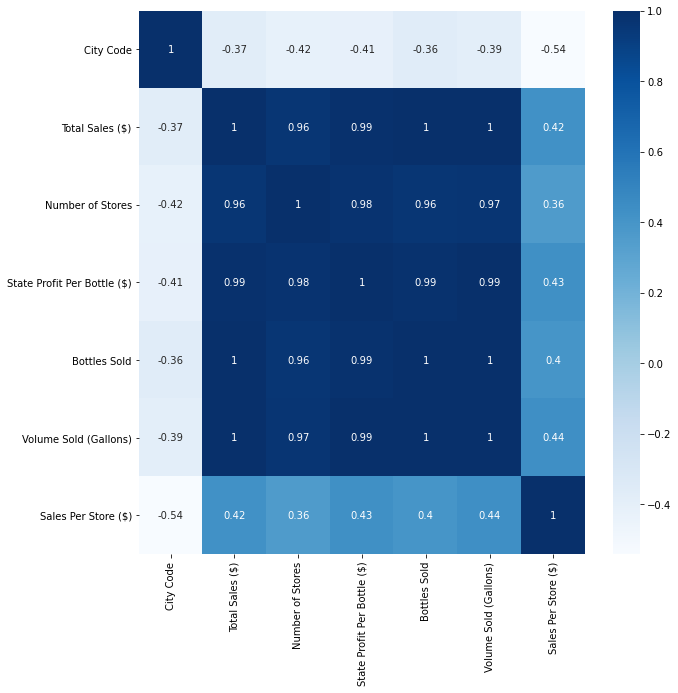

,Date,Store Name,City Code,City,Category,Category Name,Pack,Bottle Volume (ml),State Bottle Cost ($),State Bottle Retail ($),Bottles Sold,Sale ($),Volume Sold (Liters),Volume Sold (Gallons),State Profit Per Bottle ($),State Profit Total Bottle ($),Month,Year
0,2016-01-26,Jensen Liquors Ltd,0,Sheldon,1012200.0,Scotch Whiskies,6,750,21.50,32.25,1,32.25,0.75,0.20,10.75,10.75,1,2016
1,2016-01-12,Hyvee Food Store 3,1,Cedar Rapids,1701100.0,Decanters & Specialty Packages,12,750,19.58,29.37,2,58.74,1.50,0.40,9.79,19.58,1,2016
2,2016-01-13,Hyvee Food Store 2,2,Iowa City,1701100.0,Decanters & Specialty Packages,12,750,19.58,29.37,12,352.44,9.00,2.38,9.79,117.48,1,2016
3,2016-01-13,Bootleggin Barzinis Fin,3,Coralville,1701100.0,Decanters & Specialty Packages,12,750,19.58,29.37,3,88.11,2.25,0.59,9.79,29.37,1,2016
4,2016-01-14,Hillstreet News And Tobacco,4,Cedar Falls,1701100.0,Decanters & Specialty Packages,12,750,19.58,29.37,1,29.37,0.75,0.20,9.79,9.79,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4150775,2017-10-31,Stammer Liquor Corp,0,Sheldon,1070000.0,Cocktails / Rtd,12,800,8.00,12.00,3,12.00,2.40,0.63,4.00,12.00,10,2017
4150776,2017-10-31,Stammer Liquor Corp,0,Sheldon,1011200.0,Straight Bourbon Whiskies,6,750,27.48,41.22,2,41.22,1.50,0.39,13.74,27.48,10,2017
4150777,2017-10-31,Stammer Liquor Corp,0,Sheldon,1011500.0,Bottled In Bond Bourbon,6,750,24.98,37.47,2,37.47,1.50,0.39,12.49,24.98,10,2017
4150778,2017-10-31,Stammer Liquor Corp,0,Sheldon,1011200.0,Straight Bourbon Whiskies,6,750,22.49,33.74,2,33.74,1.50,0.39,11.25,22.50,10,2017


In [44]:
df_forecasting = df_filter.drop(['Store Number', 'Vendor Name', 'Item Description'], axis=1)
df_forecasting = pd.merge(df_forecasting, city_array, on='City', how='left')
col = df_forecasting.pop('City Code')
df_forecasting.insert(2, col.name, col)

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(salespercity.corr(), cmap='Blues', annot=True,)
plt.show()
df_forecasting

In [ ]:
df_forecasting.describe()

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV

In [78]:
X = salespercity[['State Profit Per Bottle ($)', 'Number of Stores', 'Volume Sold (Gallons)', 'Bottles Sold', 'Sales Per Store ($)']]
y = salespercity['Total Sales ($)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[-1.88820730e+04  5.01106414e+04  1.76028514e+05  1.07179116e+05
  9.77470750e+05  2.12294375e+05 -1.09149885e+04 -3.52160168e+02
  6.27455217e+06  8.44002762e+05  6.70786030e+05  2.75929154e+05
  5.99278540e+03  1.04755619e+06  3.05309361e+05  3.83750596e+06
 -2.45064684e+03 -2.72556201e+04  7.18689406e+05  1.65574264e+06
  2.79981297e+04  7.13778581e+05  1.46465535e+04  3.01181566e+05
  1.12321615e+06  1.10198566e+06 -4.63501805e+04  2.33424737e+05
  1.57049727e+05  1.78424606e+05  2.03777448e+06  9.52505840e+04
 -2.13845516e+04  1.82942245e+05  4.92748057e+05 -3.08767152e+04
  1.35553707e+05  4.16482265e+06  1.97378430e+05 -4.95480216e+04
  5.33417823e+04  1.53408667e+06  9.37675821e+04 -3.40498773e+04
  1.56483629e+05  3.63942417e+05  1.73384834e+05  2.28654669e+04
  1.54561693e+05 -4.15531694e+04  3.97507562e+05  4.94015340e+06
  1.10040025e+06  1.53240756e+06  2.69308245e+02  6.26279872e+04
  3.40242845e+04 -4.70910565e+04  2.24522050e+05  2.07445217e+05
  1.28891801e+05  4.39142

In [75]:
# select the best alpha with RidgeCV
alpha_range = 10.**np.arange(-2, 3)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [81]:
ridgereg = Ridge(alpha=0.01, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(y_pred)
print('--------')
print('RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 276845.6616805994


In [76]:
# examine the coefficients
rc = ridgeregcv.coef_
print(X.columns, rc)

Index(['State Profit Per Bottle ($)', 'Number of Stores',
       'Volume Sold (Gallons)', 'Bottles Sold', 'Sales Per Store ($)'],
      dtype='object') [ 3.15773178e+00 -1.72807619e+04  3.33162601e+01  9.89773887e+00
  8.36655557e-02]


0.9899530929847852
24394798952.79776
72957.21567353532
156188.34448446453


Text(0.5, 1.0, 'Ridge Regression Predictor of Future Sales')

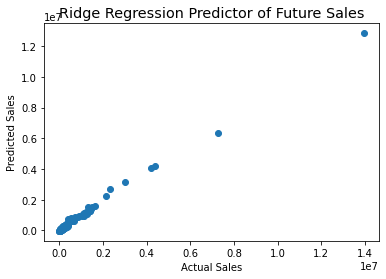

In [77]:
accuracy = metrics.r2_score(y_test, y_pred)
mse= metrics.mean_squared_error(y_test, y_pred)
mae=metrics.mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(accuracy)
print(mse)
print(mae)
print(rmse)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Ridge Regression Predictor of Future Sales', fontsize='x-large')

# -------------------------------------------------------------------------------------

In [ ]:
salespercity

In [57]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np 
dep = salespercity['Total Sales ($)']
indep = salespercity[['City Code','Number of Stores','Bottles Sold','Volume Sold (Gallons)']]
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Total Sales ($)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.254e+04
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        04:08:40   Log-Likelihood:                -5289.3
No. Observations:                 394   AIC:                         1.059e+04
Df Residuals:                     389   BIC:                         1.061e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.768e+

In [58]:
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=1)

In [59]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(indep)
print(y_pred)

[ 4.67203183e+07  2.70547763e+07  1.98116732e+07  1.43638461e+07
  1.26840745e+07  1.35341652e+07  1.28205569e+07  1.24871420e+07
  1.00648351e+07  1.06320283e+07  8.06612128e+06  7.45832018e+06
  6.18136143e+06  5.99084436e+06  5.94014743e+06  4.53510604e+06
  5.68899698e+06  3.93490285e+06  4.07724429e+06  4.05242128e+06
  3.98458353e+06  3.99873590e+06  3.25257293e+06  3.48370821e+06
  3.45168694e+06  3.46248229e+06  2.69923861e+06  3.23794975e+06
  2.49133933e+06  2.83665894e+06  2.20873429e+06  2.66234272e+06
  2.47357001e+06  2.49901368e+06  2.07060131e+06  2.38871512e+06
  1.78786095e+06  2.11834630e+06  1.54319658e+06  1.67657652e+06
  1.64697164e+06  1.53942317e+06  1.99853440e+06  1.89284232e+06
  1.55336151e+06  1.63158461e+06  1.58801033e+06  1.41295000e+06
  1.59160692e+06  1.31131224e+06  1.41149883e+06  1.18643988e+06
  1.24065947e+06  1.21079529e+06  1.08762178e+06  1.40933110e+06
  1.42371507e+06  1.53640185e+06  1.04774547e+06  1.23459956e+06
  1.24195677e+06  9.41187

In [60]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
scores = cross_val_score(lm, X_test, y_test, cv=5)
print(scores)
print(np.mean(scores))

[0.9970056  0.98956316 0.98599104 0.97971484 0.98395994]
0.9872469171345056


0.9976417238483896
27708729641.47284
79845.00817911742
166459.3933710947


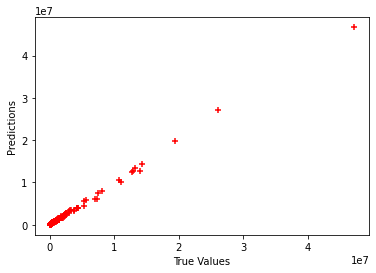

In [61]:
plt.scatter(dep, y_pred, marker='+', color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
accuracy = metrics.r2_score(dep, y_pred)
mse= metrics.mean_squared_error(dep, y_pred)
mae=metrics.mean_absolute_error(dep,y_pred)
rmse=np.sqrt(metrics.mean_squared_error(dep, y_pred))
print(accuracy)
print(mse)
print(mae)
print(rmse)

In [ ]:
np.sum(y_pred)

In [ ]:
# Accuracy for Annual Predicted Sales for 2016
accuracy=metrics.r2_score(salespercity['Total Sales ($)'], y_pred)
print(accuracy)
# Error for Annual Predicted Sales for 2016/2017
Percent_Prediction_Error = (np.sum(salespercity['Total Sales ($)'])- np.sum(y_pred))/np.sum(salespercity['Total Sales ($)'])*100
print(Percent_Prediction_Error)

In [ ]:
#from Model 9
const = 3.097e+04
CityCode = -47.0106
NumberofStores = -2.322e+04
BottlesSold = 11.6973
VolumeSoldGallons= 40.6233

In [ ]:
# Annual Predicted Sales for 2017
new_y_pred =const + CityCode*salespercity['City Code'] + NumberofStores*salespercity['Number of Stores'] + BottlesSold*salespercity['Bottles Sold'] + VolumeSoldGallons*salespercity['Volume Sold (Gallons)']
np.sum(new_y_pred)

In [ ]:
# Accuracy for Annual Predicted Sales for 2016
accuracy=metrics.r2_score(salespercity['Total Sales ($)'], new_y_pred)
print(accuracy)

In [ ]:
# Error for Annual Predicted Sales for 2016/2017
Percent_Prediction_Error = (np.sum(salespercity['Total Sales ($)'])- np.sum(new_y_pred))/np.sum(salespercity['Total Sales ($)'])*100
print(Percent_Prediction_Error)

In [ ]:
## Time Series Analysis

y = df_filter.groupby('Date')['Sale ($)'].sum().resample('MS').mean()
y.plot()

In [ ]:
df_forecasting

In [ ]:
V_Liters = pd.DataFrame({'V_Liters':df_forecasting.groupby(['City'])['Volume Sold (Liters)'].sum()})
bottles = pd.DataFrame({'Bottles':df_forecasting.groupby(['City'])['Bottles Sold'].sum()})
sales_y16q1 = pd.DataFrame({'Q1Y16':df_forecasting[(df_forecasting.Date >= '2016-01-01') & (df_forecasting.Date < '2016-04-01')].groupby(['City'])['Sale ($)'].sum()})
sales_y16q2 = pd.DataFrame({'Q2Y16':df_forecasting[(df_forecasting.Date >= '2016-04-01') & (df_forecasting.Date < '2016-07-01')].groupby(['City'])['Sale ($)'].sum()})
sales_y16q3 = pd.DataFrame({'Q3Y16':df_forecasting[(df_forecasting.Date >= '2016-07-01') & (df_forecasting.Date < '2016-10-01')].groupby(['City'])['Sale ($)'].sum()})
sales_y16q4 = pd.DataFrame({'Q4Y16':df_forecasting[(df_forecasting.Date >= '2016-10-01') & (df_forecasting.Date < '2017-01-01')].groupby(['City'])['Sale ($)'].sum()})
sales_y17q1 = pd.DataFrame({'Q1Y17':df_forecasting[(df_forecasting.Date >= '2017-01-01') & (df_forecasting.Date < '2017-04-01')].groupby(['City'])['Sale ($)'].sum()})
sales_y17q2 = pd.DataFrame({'Q2Y17':df_forecasting[(df_forecasting.Date >= '2017-04-01') & (df_forecasting.Date < '2017-07-01')].groupby(['City'])['Sale ($)'].sum()})
sales_y17q3 = pd.DataFrame({'Q3Y17':df_forecasting[(df_forecasting.Date >= '2017-07-01') & (df_forecasting.Date < '2017-10-01')].groupby(['City'])['Sale ($)'].sum()})
city_sales = pd.concat([bottles, V_Liters ,sales_y16q1, sales_y16q2, sales_y16q3, sales_y16q4, sales_y17q1, sales_y17q2, sales_y17q3], axis =1, join = 'outer').sort_values('V_Liters', ascending=False).reset_index()
city_sales.fillna(0,inplace = True)
city_sales['Vol Mean'] = city_sales['V_Liters'] / city_sales['Bottles']
city_sales.head()

In [ ]:
increment = city_sales.Q3Y17.sum()/city_sales.Q3Y16.sum()
print ('The increment from 2016 to 2017:', increment)
Q4Y17 = city_sales.Q4Y16.sum()*city_sales.Q3Y17.sum()/city_sales.Q3Y16.sum()
print ('Forecast of sales for Q4 Y17: $', Q4Y17)
FY17 = city_sales.Q1Y17.sum() + city_sales.Q2Y17.sum() + city_sales.Q3Y17.sum() + Q4Y17
print ('The forecast for the fiscal year 2017: $', FY17)

In [ ]:
X = city_sales[['Q3Y16', 'Vol Mean']]
y = city_sales.Q3Y17

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print(predictions)
print(X_train.shape)
print(y_train.shape)